# Qiskit Interactive Tutorial April 24, 2024

**Prof. Dr. Birger Horstmann, Dr. Alejandro D. Somoza**

Adapted from: https://github.com/Qiskit/documentation/


# 1) Qbits

If you have a set of $n$ bits (or qubits), you'll usually label each bit $0
\rightarrow n-1$. Different softwares and resources must choose how they order
these bits both in computer memory and when displayed on-screen. The `QuantumCircuit` class stores its qubits in a list
(`QuantumCircuit.qubits`). The index of a qubit in this list defines the qubit's label.




## 1.1 Bit-ordering in Qiskit

When displaying or interpreting a list of bits (or qubits) as a string, bit
$n$ is the leftmost bit, and bit $0$ is the rightmost bit. 


$$| q_{n-1} \cdots q_0 \rangle$$


This is because we usually write binary numbers with the most significant digit on the left, and in Qiskit, bit $n$ is interpreted as the most significant bit. This ordering affects how multi-qubit states and operators are represented and understood. In quantum computing, the tensor product is used to construct the state space of multi-qubit systems. For two qubits $|a\rangle$ and $|b\rangle$, the combined state in a system adhering to little-endian convention is $|b\rangle \otimes |a\rangle$.

### State indices 
For example, the following cell defines a `Statevector` from a string of single-qubit states. In this case, qubit $0$ is in state $|+\rangle$, and qubit $1$ in state $|0\rangle$.

In [ ]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_label("0+")
sv.probabilities_dict()

{np.str_('00'): np.float64(0.4999999999999999),
 np.str_('01'): np.float64(0.4999999999999999)}

This occasionally causes confusion when interpreting a string of bits, as you
might expect the leftmost bit to be bit $0$, whereas it usually represents bit
$n$.

When representing a statevector as a list of complex numbers (amplitudes),
Qiskit orders these amplitudes such that the amplitude at index $x$ represents
the computational basis state $|x\rangle$.

```python
print(sv[1])  # amplitude of state |01>
print(sv[2])  # amplitude of state |10>
```

```
(0.7071067811865475+0j)
0j
```


#### Exercise 1

What are the probabilities of measuring each state of the three-qubits computational basis if qubit $0$ is in state $|+\rangle$, qubit $1$ in state $|0\rangle$ and qubit $2$ in state $|-\rangle$ ? Use qiskit to answer (or verify your answer).

In [107]:
# Use this cell solve Exercise 1
from qiskit.quantum_info import Statevector
import numpy as np

# Qubit 2: |->, Qubit 1: |0>, Qubit 0: |+>
# Qiskit ordering: qubit-2 (left), qubit-1 (middle), qubit-0 (right)
# So from_label is rightmost as qubit-0: "|0+->" for |q2 q1 q0>
sv = Statevector.from_label("-0+")
probs = sv.probabilities_dict()
probs

{np.str_('000'): np.float64(0.2499999999999999),
 np.str_('001'): np.float64(0.2499999999999999),
 np.str_('100'): np.float64(0.2499999999999999),
 np.str_('101'): np.float64(0.2499999999999999)}

### Operator indices

The CNOT (Controlled-NOT) gate is a two-qubit quantum gate that performs an X gate on the second qubit (target), only if the first qubit (control) is in the state $|1\rangle$. The action of the CNOT gate can be understood differently depending on the bit ordering convention.

In [108]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

# Create a quantum circuit with CNOT
qc = QuantumCircuit(2)
qc.cx(0, 1)  # qubit 0 is control, qubit 1 is target in Qiskit's little-endian convention
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

Now can use this circuit to define a generic operator, whose unitary is stored in its `data` attribute. The method `array_to_latex` allows us to print the unitary using Latex.

In [109]:
# Convert to operator and display
op_le = Operator(qc)
array_to_latex(op_le.data, prefix="\\text{CNOT Matrix (LE)} =")

<IPython.core.display.Latex object>

#### Exercise 2

Find the matrix representation in the computational basis of the three Pauli matrices.

You can use these methods on your ```qc = QuantumCircuit()``` object:
```python
qc.x(0)
qc.y(0)
qc.Z(0)
```

In [110]:
# Use this cell solve Exercise 2
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex
from IPython.display import display

# Pauli X
qc_x = QuantumCircuit(1)
qc_x.x(0)
op_x = Operator(qc_x)
display(array_to_latex(op_x.data, prefix="\\text{Pauli X} = "))

# Pauli Y
qc_y = QuantumCircuit(1)
qc_y.y(0)
op_y = Operator(qc_y)
display(array_to_latex(op_y.data, prefix="\\text{Pauli Y} = "))

# Pauli Z
qc_z = QuantumCircuit(1)
qc_z.z(0)
op_z = Operator(qc_z)
display(array_to_latex(op_z.data, prefix="\\text{Pauli Z} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Reverse operations


To draw a circuit with qubits in reversed order (that is, qubit $0$ at the
bottom), use the `reverse_bits` argument. This only affects the generated
diagram and does not affect the circuit; the X-gate still acts on qubit $

In [111]:
qc.draw(reverse_bits=True)

┌───┐
q_1: ┤ X ├
     └─┬─┘
q_0: ──■──

You can use the `reverse_bits` method to return a new circuit `qc_rev` with the
qubits' labels reversed (this does not mutate the original `qc` circuit).

In [112]:
qc_rev = qc.reverse_bits()
qc_rev.draw()

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

Notice that now, this CNOT gate in the big-endian convention has a different matrix representation, and the left-most

In [113]:
# Convert to operator and display
op_be = Operator(qc_rev)
array_to_latex(op_be.data, prefix="\\text{CNOT Matrix (BE)} =")

<IPython.core.display.Latex object>

#### Exercise 3

We define a quantum circuit on two qubits with a $X$ gate applied on qubit $0$ and a $Y$ gate applied on qubit $1$ (see in cell below). What would be its matrix representation? What about the matrix of the circuit with reversed bits?

In [114]:
# Use this cell solve Exercise 3

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

# Define the circuit: X on qubit 0, Y on qubit 1
qc_ex3 = QuantumCircuit(2)
qc_ex3.x(0)
qc_ex3.y(1)

# Compute the operator (matrix) of the circuit
op_x = Operator(qc_ex3)

# Display matrix in LaTeX form
display(array_to_latex(op_x.data, prefix="\\text{Matrix} = "))

# --- Reversed bits ---
op_rev = Operator(qc_ex3.reverse_bits())


display(array_to_latex(op_rev.data, prefix="\\text{Reversed bits matrix} = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 1.2 State preparation

In [115]:
from qiskit import QuantumCircuit

In quantum computing, state preparation is the first step in constructing a quantum algorithm. It involves setting the initial state of the qubits in the quantum circuit. Proper state preparation is crucial as it determines the starting point of the computation. Common states prepared in quantum experiments include the basic computational basis states $|0\rangle$ and $|1\rangle$, superposition states such as $|+\rangle$ and $|-\rangle$, and entangled states like the Bell states. Here, we'll show how to prepare a few of these states using Qiskit.

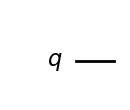

In [116]:
### Prepare a quantum circuit with one qubit in the |0> state (this is the default)
qc_0 = QuantumCircuit(1)
qc_0.draw(output='mpl')

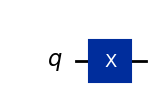

In [117]:
### Prepare a quantum circuit with one qubit in the |1> state
qc_1 = QuantumCircuit(1)
qc_1.x(0)  # Applying X gate to flip |0> to |1>
qc_1.draw(output='mpl')

Preparing Superposition States

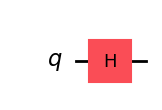

In [118]:
### Prepare a quantum circuit with one qubit in the |+> state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # Applying H gate to create superposition
qc_plus.draw(output='mpl')

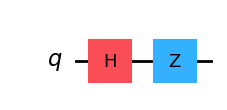

In [119]:
### Prepare a quantum circuit with one qubit in the |-> state
qc_minus = QuantumCircuit(1)
qc_minus.h(0)
qc_minus.z(0)  # Applying Z gate after H to get |-> state
qc_minus.draw(output='mpl')

Preparing Entangled States (Bell State)

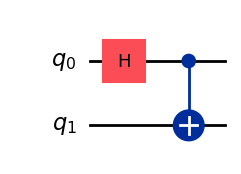

In [120]:
### Prepare a Bell state |Φ+> = (|00⟩ + |11⟩)/√2
qc_bell = QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0, 1)  # CNOT gate to entangle the qubits
qc_bell.draw(output='mpl')

#### Exercise 4 (Optional)

Draw the quantum circuits that would generate the other three Bell states: $|\Phi_{-}\rangle=\frac{1}{\sqrt{2}}\left(|00\rangle-|11\rangle\right)$, $|\Psi_{+}\rangle=\frac{1}{\sqrt{2}}\left(|01\rangle+|10\rangle\right)$ and $|\Psi_{-}\rangle=\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$.

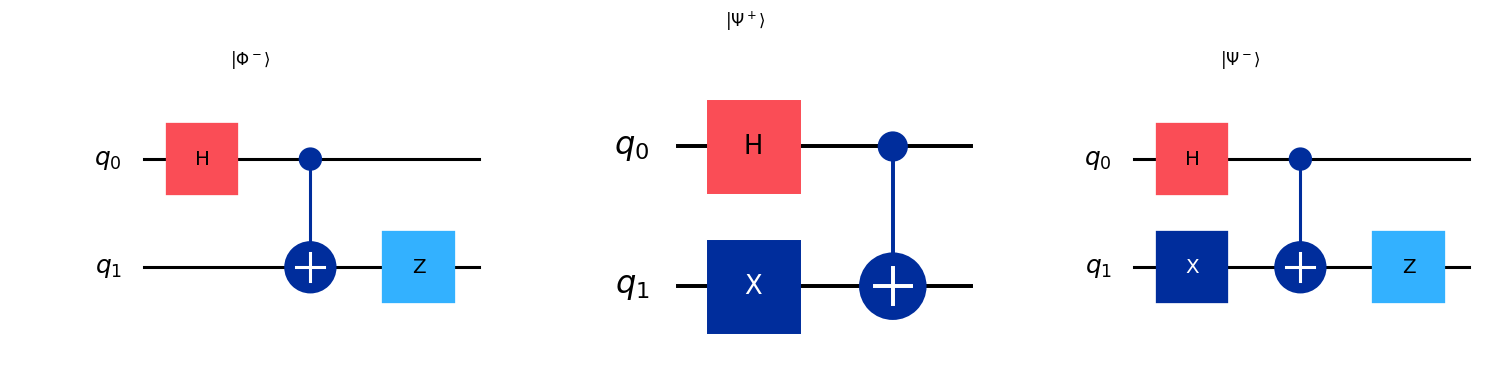

In [121]:
# Use this cell solve Exercise 4

from qiskit import QuantumCircuit


qc_bell_phi_minus = QuantumCircuit(2)
qc_bell_psi_plus = QuantumCircuit(2)
qc_bell_psi_minus = QuantumCircuit(2)

# |Φ−⟩ = (|00⟩ - |11⟩)/√2
qc_bell_phi_minus.h(0) # Hadamard gate on qubit 0
qc_bell_phi_minus.cx(0, 1) # CNOT gate to entangle the qubits
qc_bell_phi_minus.z(1)  # Phase flip on target after CNOT to introduce the minus sign

# |Ψ+⟩ = (|01⟩ + |10⟩)/√2
qc_bell_psi_plus.x(1)        # Flip qubit 1 to |1⟩
qc_bell_psi_plus.h(0) # Hadamard gate on qubit 0
qc_bell_psi_plus.cx(0, 1)    # Entangle

# |Ψ−⟩ = (|01⟩ - |10⟩)/√2
qc_bell_psi_minus.x(1) # Flip qubit 1 to |1⟩
qc_bell_psi_minus.h(0) # Hadamard gate on qubit 0
qc_bell_psi_minus.cx(0, 1) # CNOT gate to entangle the qubits
qc_bell_psi_minus.z(1)       # Phase flip on target

# display the circuits:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,4))

qc_bell_phi_minus.draw(output='mpl', ax=axs[0])
axs[0].set_title(r"$|\Phi^-\rangle$")

qc_bell_psi_plus.draw(output='mpl', ax=axs[1])
axs[1].set_title(r"$|\Psi^+\rangle$")

qc_bell_psi_minus.draw(output='mpl', ax=axs[2])
axs[2].set_title(r"$|\Psi^-\rangle$")

plt.tight_layout()
plt.show()


# 2) Quantum Gates

Quantum gates are the building blocks of quantum circuits, similar to logic gates in classical circuits. 

## 2.1 Example: Beamsplitters and the $\sqrt{\text{NOT}}$ gate

The $\sqrt{\text{NOT}}$ gate is particularly interesting because it represents a half-way operation between doing nothing and flipping a qubit entirely (the NOT operation). Mathematically, it corresponds to a 45° rotation of the qubit state around the X-axis on the Bloch sphere, demonstrating how quantum gates can implement continuous transformations. The $\sqrt{\text{NOT}}$ gate can be represented by the unitary matrix:

$$
\sqrt{X} = \frac{1}{2}
\begin{bmatrix}
1 + i & 1 - i \\
1 - i & 1 + i
\end{bmatrix}
$$

This gate effects a $\pi/4$ (or 45°) rotation around the X-axis of the Bloch sphere. In optical terms, this is analogous to how a beam splitter would create a 50-50 chance of reflection or transmission, thereby creating a superposition of paths—here, we create a superposition of states.

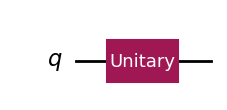

In [122]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

# Define the sqrt(NOT) gate matrix
sqrt_not_matrix = 1/2 * np.array([[1+1j, 1-1j], [1-1j, 1+1j]])

# Create a custom gate from the unitary matrix
sqrt_not_gate = Operator(sqrt_not_matrix)

# Apply the sqrt(NOT) gate in a quantum circuit
qc = QuantumCircuit(1)
qc.append(sqrt_not_gate, [0])
qc.draw(output='mpl')

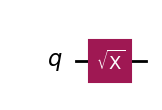

In [123]:
# The sqrt(NOT) is natively included in Qiskit's gate library
qc = QuantumCircuit(1)
qc.sx(0)
qc.draw(output='mpl')

Since the consecutive action of two $\text{NOT}$ gates leaves the qubit invariant ($\sigma_x^2=1$), the consecutive action of 4 $\sqrt{\text{NOT}}$ gates should also be proportional to the identity. Now let us demonstrate this by applying the $\sqrt{\text{NOT}}$ gate 4 consecutive times to the $|0\rangle$ state. For this, we can use the `evolve` method Qiskit's `Statevector` class, such that `mystate.evolve(myoperator)` will apply the operator `myoperator` from the `Operator` class to the state `mystate`.

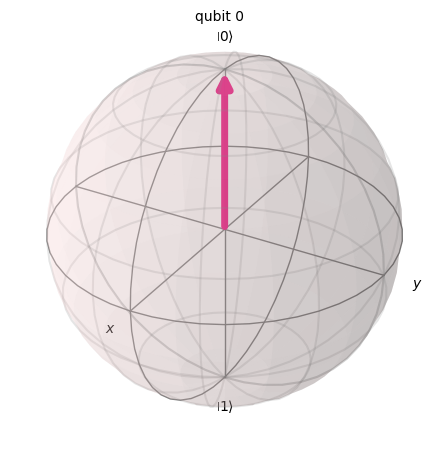

In [124]:
# Visualize the effect of the sqrt(NOT) gate on the state |0>
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# We start at |0>
state = Statevector.from_label('0')
plot_bloch_multivector(state)

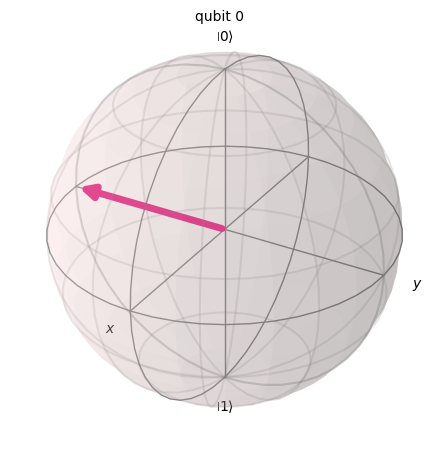

In [125]:
# Apply sqrt(NOT)
state = state.evolve(sqrt_not_gate)
plot_bloch_multivector(state)

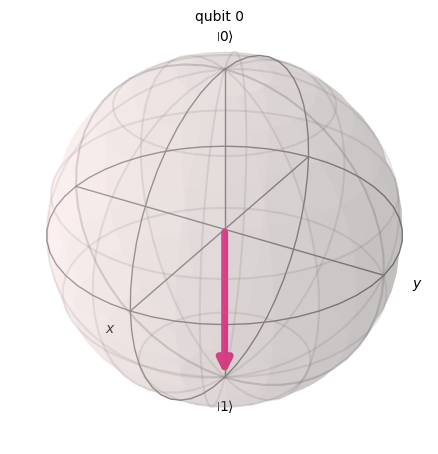

In [126]:
# Apply sqrt(NOT)
state = state.evolve(sqrt_not_gate)
plot_bloch_multivector(state)

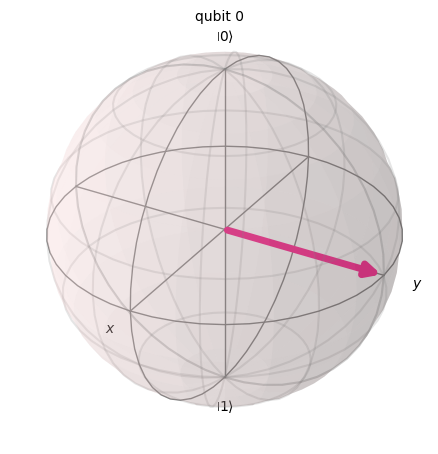

In [127]:
# Apply sqrt(NOT)
state = state.evolve(sqrt_not_gate)
plot_bloch_multivector(state)

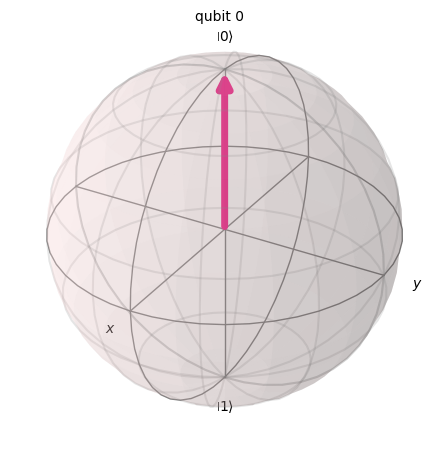

In [128]:
# Apply sqrt(NOT)
state = state.evolve(sqrt_not_gate)
plot_bloch_multivector(state)

In Jupyter notebooks, we can retrieve information about any object by appending the `?` character

In [129]:
state.evolve?

Signature:
state.evolve(
    other: 'Operator | QuantumCircuit | Instruction',
    qargs: 'list[int] | None' = None,
) -> 'Statevector'
Docstring:
Evolve a quantum state by the operator.

Args:
    other (Operator | QuantumCircuit | circuit.Instruction): The operator to evolve by.
    qargs (list): a list of Statevector subsystem positions to apply
                   the operator on.

Returns:
    Statevector: the output quantum state.

Raises:
    QiskitError: if the operator dimension does not match the
                 specified Statevector subsystem dimensions.
File:      ~/QuantumComputing/.venv/lib/python3.11/site-packages/qiskit/quantum_info/states/statevector.py
Type:      method

#### Exercise 5

1. Show the Bloch sphere after applying, on a qubit in initial state $|0\rangle$, first the gate $\sqrt{NOT}$ followed by the gate $Z$. 
2. (Optional) Find another sequence of gates that give the same final state.

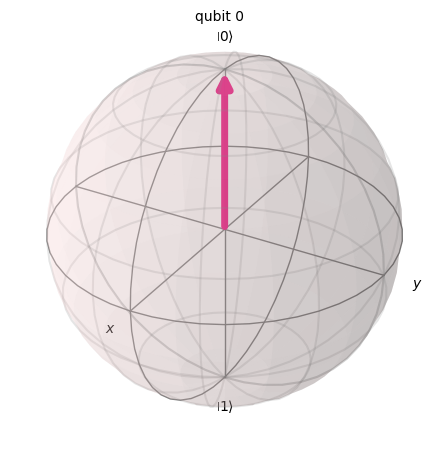

In [130]:
# Use this cell solve Exercise 5


from qiskit.quantum_info import Operator
import numpy as np

# Define the sqrt(NOT) gate matrix
sqrt_not_matrix = 1/2 * np.array([[1+1j, 1-1j], [1-1j, 1+1j]])

# Create a custom gate from the unitary matrix
sqrt_not_gate = Operator(sqrt_not_matrix)


# Create an numpy array for the Z gate
Z_matrix = np.array([[1, 0], [0, -1]])

# Create a custom gate from the unitary for the Z gate using the Operator class
Z_gate = Operator(Z_matrix)



# Initialise the state
state_ex5 = Statevector.from_label('0')
plot_bloch_multivector(state_ex5)



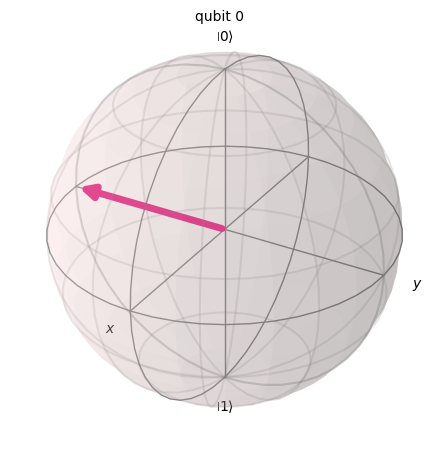

In [131]:
# SQRT(NOT)
state_ex5 = state_ex5.evolve(sqrt_not_gate)
plot_bloch_multivector(state_ex5)

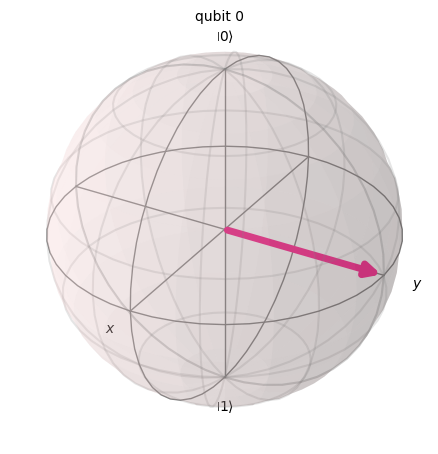

In [132]:
# Z_Gate
state_ex5 = state_ex5.evolve(Z_gate)
plot_bloch_multivector(state_ex5)

## 2.2 Appending vs composing circuits

In Qiskit, the `append` and `compose` methods are used to add gates or circuits to a quantum circuit, but they serve different purposes and operate in slightly different ways:

### 2.2.1. `append` Method:
- **Purpose**: The `append` method is used to add a single gate, a set of gates, or a sub-circuit to an existing quantum circuit at specified qubit positions.
- **Usage**: You specify which qubits the gate or sub-circuit should act on. It's essentially for adding one element at a time to the circuit.
- **Flexibility**: It allows you to insert custom gates or built-in gates into the circuit. You can specify the qubits and, if applicable, the classical bits (for measurements or conditional operations).
- **Example**:

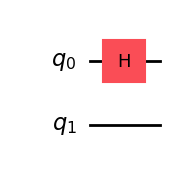

In [133]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate

qc = QuantumCircuit(2)
h_gate = HGate()
qc.append(h_gate, [0])  # Append an H gate to the first qubit
qc.draw(output='mpl')


In [134]:
qc.append?

Signature:
qc.append(
    instruction: 'Operation | CircuitInstruction',
    qargs: 'Sequence[QubitSpecifier] | None' = None,
    cargs: 'Sequence[ClbitSpecifier] | None' = None,
    *,
    copy: 'bool' = True,
) -> 'InstructionSet'
Docstring:
Append one or more instructions to the end of the circuit, modifying the circuit in
place.

The ``qargs`` and ``cargs`` will be expanded and broadcast according to the rules of the
given :class:`~.circuit.Instruction`, and any non-:class:`.Bit` specifiers (such as
integer indices) will be resolved into the relevant instances.

If a :class:`.CircuitInstruction` is given, it will be unwrapped, verified in the context of
this circuit, and a new object will be appended to the circuit.  In this case, you may not
pass ``qargs`` or ``cargs`` separately.

Args:
    instruction: :class:`~.circuit.Instruction` instance to append, or a
        :class:`.CircuitInstruction` with all its context.
    qargs: specifiers of the :class:`~.circuit.Qubit`\ s to atta

#### Exercise 6 (Optional)

1. Recreate quantum circuits associated to the sequence of gates you have applied in Exercise 5, using the append method, and then draw them.
2. Find the matrix representations of these quantum circuits. Are they equal? 

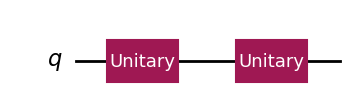

In [135]:
# Use this cell to solve Exercise 6

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

qc1_ex6 = QuantumCircuit(1)
qc2_ex6 = QuantumCircuit(1)

op_sqrt_not_gate = Operator(sqrt_not_gate);
op_z_gate = Operator(Z_gate);


qc1_ex6.append(sqrt_not_gate, [0])
qc1_ex6.append(Z_gate, [0])


qc1_ex6.draw(output='mpl')



### 2.2.2. `compose` Method:
- **Purpose**: The `compose` method is used to combine two circuits where the second circuit is added to the first in a manner that respects the qubit ordering and does not necessarily align qubit indices unless specified. It is akin to function composition in mathematics (f(g(x))).
- **Usage**: This method is more flexible when integrating entire circuits together. You can specify how the qubits of the two circuits correspond to each other, either by using indices or qubit objects.
- **Flexibility**: It supports advanced composition features such as permuting qubits, adding circuits at specific positions, and more complex integrations of multiple circuits.
- **Example**:

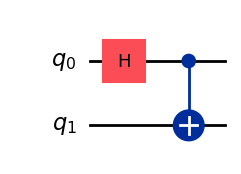

In [136]:
qc1 = QuantumCircuit(2)
qc2 = QuantumCircuit(2)
qc1.h(0)
qc2.cx(0, 1)
# Compose qc2 into qc1; the operations in qc2 follow those in qc1
qc3 = qc1.compose(qc2)
qc3.draw(output='mpl')

In [137]:
qc.compose?

Signature:
qc.compose(
    other: "Union['QuantumCircuit', Instruction]",
    qubits: 'QubitSpecifier | Sequence[QubitSpecifier] | None' = None,
    clbits: 'ClbitSpecifier | Sequence[ClbitSpecifier] | None' = None,
    front: 'bool' = False,
    inplace: 'bool' = False,
    wrap: 'bool' = False,
    *,
    copy: 'bool' = True,
    var_remap: 'Mapping[str | expr.Var | expr.Stretch, str | expr.Var | expr.Stretch] | None' = None,
    inline_captures: 'bool' = False,
) -> "Optional['QuantumCircuit']"
Docstring:
Apply the instructions from one circuit onto specified qubits and/or clbits on another.

.. note::

    By default, this creates a new circuit object, leaving ``self`` untouched.  For most
    uses of this function, it is far more efficient to set ``inplace=True`` and modify the
    base circuit in-place.

When dealing with realtime variables (:class:`.expr.Var` and :class:`.expr.Stretch` instances),
there are two principal strategies for using :meth:`compose`:

1. The ``other`` ci

#### Main Differences:
- **Context of Use**: `append` is generally used for adding individual elements (like a single gate or a small block) to specific parts of a circuit, whereas `compose` is used for combining two complete circuits into one, where the operations of one follow directly from the operations of the other.
- **Operational Level**: `append` deals with adding elements at the level of individual operations or gates. In contrast, `compose` is about merging two whole circuits.
- **Output**: `append` modifies the existing circuit directly (unless you use it in a context that implicitly copies, like within a method chain), while `compose` returns a new circuit by default, unless specified otherwise with the `inplace=True` parameter.

These methods provide powerful ways to build and manipulate quantum circuits in Qiskit, supporting both granular additions of quantum operations and the integration of complex quantum routines.

# 3) Basics of a quantum algorithm

## 3.1 Primitives: samplers and estimators

The two most common tasks quantum computers are used for are sampling quantum states and calculating expectation values. These tasks motivated the design of the Qiskit `primitives`: `Sampler` and `Estimator`. A primitive is the smallest processing instruction, the simplest building block from which one can create something useful for a given abstraction level.

Qiskit offers two routes for the use of primitives:

    1. Local simulations with `qiskit.primitive`
    2. Simulations on real IBMQ hardware via `QiskitRuntimeService` 

### 3.1.1 Statevector (only noiseless)

The reference primitives in Qiskit perform local statevector simulations. These simulations do not support modeling device noise, but are useful for quickly prototyping algorithms before looking into more advanced simulation techniques (using Qiskit Aer) or running on real devices (Qiskit Runtime primitives). The `Estimator` primitive can compute expectation values of circuits, and the `Sampler` primitive can sample from output distributions of circuits.



### Sampler

Sampler take circuits and parameters as inputs and return the results from sampling from the output probability distributions. The new `StatevectorSampler` (V2) output can be expressed as an array of sampled values (bitstring) or "counts" for each bitstring present in the output distribution.

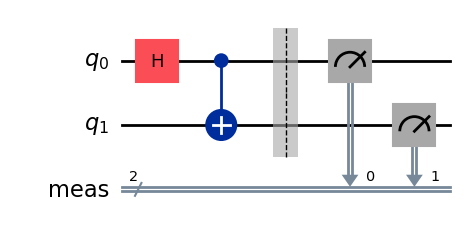

In [138]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl", style="iqp")

In [139]:
# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)

In [140]:
from qiskit.primitives import StatevectorSampler
 
sampler = StatevectorSampler()

In [141]:
# execute 1 circuit with Sampler V2
job = sampler.run([isa_circuit]) 
pub_result = job.result()[0]
print(f" > Result class: {type(pub_result)}")

 > Result class: <class 'qiskit.primitives.containers.sampler_pub_result.SamplerPubResult'>


Get the probability distribution or measurement outcome

In [142]:
# Define quantum circuit with 2 qubits
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [143]:
# Run using V2 sampler
result = sampler.run([circuit]).result()
# Access result data for PUB 0
data_pub = result[0].data
# Access bitstring for the classical register "meas"
bitstrings = data_pub.meas.get_bitstrings()
print(f"The number of bitstrings is: {len(bitstrings)}")
# Get counts for the classical register "meas"
counts = data_pub.meas.get_counts()
print(f"The counts are: {counts}")

The number of bitstrings is: 1024
The counts are: {'00': 540, '11': 484}


### Estimator

By default, the reference `Estimator` performs an exact statevector calculation based on the `quantum_info.Statevector` class. However, this can be modified to introduce the effect of the sampling overhead (also known as "shot noise").

With the introduction of the new V2 interface, the sampling overhead in the `Estimator` is now more concretely defined. The new interface accepts a precision argument that expresses the error bars that the primitive implementation should target for expectation values estimates, instead of the number of shots used in the V1 interface.

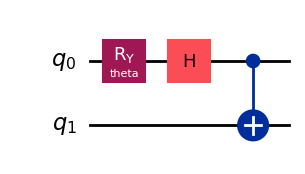

In [144]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
 
# circuit for which you want to obtain the expected value
qc = QuantumCircuit(2)
qc.ry(Parameter('theta'), 0)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl", style="iqp")

In [145]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
 
# observable(s) whose expected values you want to compute
from qiskit.quantum_info import SparsePauliOp
observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
 
# value(s) for the circuit parameter(s)
parameter_values = [[0], [np.pi/6], [np.pi/2]]

In [146]:
# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)

In [147]:
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

In [148]:
job = estimator.run([(isa_circuit, isa_observable, parameter_values)])
result = job.result()
print(f" > Result class: {type(result)}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>


In [149]:
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Expectation value: [4.         3.73205081 2.        ]
 > Metadata: {'target_precision': 0.0, 'circuit_metadata': {}}


### 3.1.2 Noisy simulations

/var/folders/43/bl2gmn9542jdzhl2s20pjgqr0000gn/T/ipykernel_42115/2229108466.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  circuit = EfficientSU2(n_qubits)


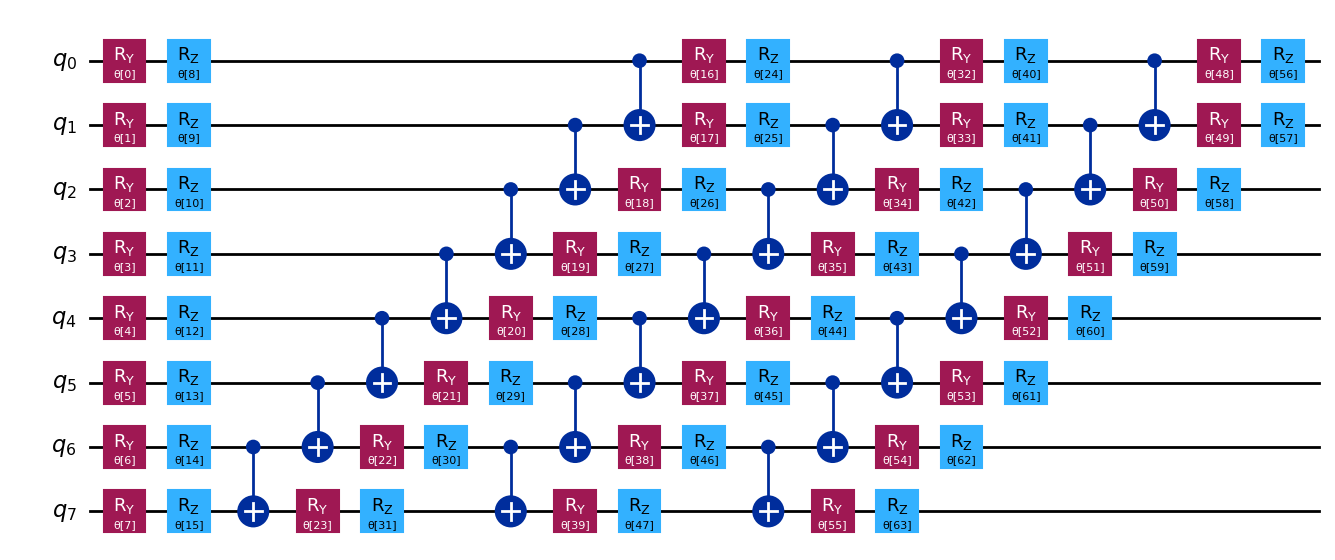

In [161]:
from qiskit.circuit.library import EfficientSU2
 
n_qubits = 8
circuit = EfficientSU2(n_qubits)
circuit.decompose().draw("mpl")

This circuit contains parameters to represent the rotation angles for RyRy​ and RzRz​ gates. When simulating this circuit, we need to specify explicit values for these parameters. In the next cell, we specify some values for these parameters and use the Estimator(opens in a new tab) primitive from Qiskit Aer to compute the exact expectation value of the observable ZZ⋯ZZZ⋯Z.

In [180]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator
 
observable = SparsePauliOp("Z" * n_qubits)
params = [0.1] * circuit.num_parameters
 
exact_estimator = Estimator()
job = exact_estimator.run(circuit, observable, params)
exact_value = job.result().values[0]
exact_value

np.float64(0.88671875)

Now, let's initialize a noise model that includes depolarizing error of 2% on every CX gate. In practice, the error arising from the two-qubit gates, which are CX gates here, are the dominant source of error when running a circuit. In the next cell, we construct an Estimator that incorporates this noise model and use it to compute the expectation value of the observable.

In [191]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
 
noise_model = NoiseModel()
cx_depolarizing_prob = 0.02
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(cx_depolarizing_prob, 2), ["cx"]
)
 
noisy_estimator = Estimator(
    backend_options={"noise_model": noise_model}
)
job = noisy_estimator.run(circuit, observable, params)
noisy_value = job.result().values[0]
noisy_value

np.float64(0.67578125)

## Exercise 7: 
Now do it without NoiseModel using the ``Estimator`` (just like above)

In [185]:
pm = generate_preset_pass_manager(optimization_level=1)
isa_observable_no_noise = observable.apply_layout(circuit.layout)

estimator = StatevectorEstimator()

job = estimator.run([(circuit, isa_observable_no_noise, parameter_values)])
result = job.result()

print(f" > Result class: {type(result)}")
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>
 > Expectation value: 0.8870140234256595
 > Metadata: {'target_precision': 0.0, 'circuit_metadata': {}}


## 3.2 Backends

Quantum computers come in very different flavours. The `IBMbackend` class allows us to define multiple quantum computing architectures by conceiving a device with an specific coupling map or qubit layout, a (universal) set of operations or gates, and procedures to measure and collect the state of the register when desired. Each backend is subject to different noisy processes. This noise can be experimentally characterized by measuring for example the $T_1$, $T_2$ times of each qubit, or the error introduced in the application of a given gate. In summary, some of the most important attributes of a quantum backend are

    - Coupling map: how are qubits connected? Determined by the topology of the register
    - Native gates: it depends on the specific protocol for generating entanglement between qubits.
    - Noise model: qubit frequencies, dephasing times and errors associated with a given gate
    - Number of shots
    - etc.